## Imports

In [1]:
import pandas as pd

In [2]:
import riotwatcher
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
df = pd.read_csv('../datasets/match_df.csv')

In [5]:
df.head()

,MATCH_ID,index,companion,gold_left,last_round,level,placement,players_eliminated,puuid,time_eliminated,total_damage_to_players,traits,units
0,NA1_4203444536,0,{'content_ID': '52fbe476-4038-432f-b94e-42914f...,9,35,8,2,1,7ITtMsLN7KDC4SwYh_-1Zz7r4_lJxuhOxrCkEahxgoHC0E...,2122.814453,135,"[{'name': 'Set6_Academy', 'num_units': 2, 'sty...","[{'character_id': 'TFT6_Ziggs', 'items': [], '..."
1,NA1_4203444536,1,{'content_ID': '72aaced9-2acd-42ec-a1f0-b6dc40...,0,30,8,6,0,fgu9lQCLiEYZjOyFZDBu8SXgi4UMG47GnQIKrnlO3xs5fc...,1821.564819,49,"[{'name': 'Set6_Bruiser', 'num_units': 5, 'sty...","[{'character_id': 'TFT6_Illaoi', 'items': [219..."
2,NA1_4203444536,2,{'content_ID': 'b36d46ca-120e-4a74-8420-6a10ce...,2,35,8,1,2,QGiza2F9yCqCmk6TrOLKuA3xvkAps3nDAeGN37VsETTxB7...,2122.814453,192,"[{'name': 'Set6_Arcanist', 'num_units': 2, 'st...","[{'character_id': 'TFT6_Poppy', 'items': [59],..."
3,NA1_4203444536,3,{'content_ID': '8c82996d-a343-4319-9a9a-9544f8...,90,33,8,4,0,O5DG0SCuJLIHd07HIsxo5pQWmxLKPOf4QQ6AEbbrq9cFjv...,1987.486938,123,"[{'name': 'Set6_Chemtech', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Singed', 'items': [], ..."
4,NA1_4203444536,4,{'content_ID': '531c49c7-b446-4807-8b91-100515...,1,33,8,5,2,1VowMpU3PoNpxMmVx67I3vQ14hC6GVIpz2n2TFq63OXvY2...,1978.977661,89,"[{'name': 'Set6_Academy', 'num_units': 1, 'sty...","[{'character_id': 'TFT6_Vi', 'items': [], 'nam..."


# Helper Functions

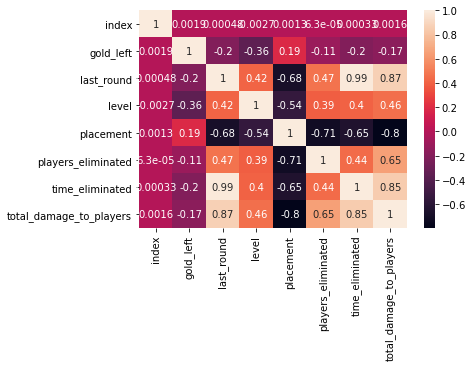

In [6]:
sns.heatmap(df.corr(), annot=True);

In [7]:
df.drop(columns=['last_round','time_eliminated','companion','puuid'], inplace=True)

Since these features are directly tied to placement (i.e. if you have the highest last round or time eliminated , you were first)

In [8]:
df.dtypes

MATCH_ID                   object
index                       int64
gold_left                   int64
level                       int64
placement                   int64
players_eliminated          int64
total_damage_to_players     int64
traits                     object
units                      object
dtype: object

Traits and units are dictionaries right now, need to convert to categoricals

In [9]:
#Get all traits

In [10]:
all_traits = set()

for row in df['traits']:
    traits_df = pd.DataFrame(ast.literal_eval(row))
    try:
        for trait in traits_df['name']:
            all_traits.add(trait)
    except:
        pass

# Converting Dictionaries to New Rows

### Create new series and assign manually

Create new series

Manually add values where they exist

Set null to 0



In [11]:
df.head()

,MATCH_ID,index,gold_left,level,placement,players_eliminated,total_damage_to_players,traits,units
0,NA1_4203444536,0,9,8,2,1,135,"[{'name': 'Set6_Academy', 'num_units': 2, 'sty...","[{'character_id': 'TFT6_Ziggs', 'items': [], '..."
1,NA1_4203444536,1,0,8,6,0,49,"[{'name': 'Set6_Bruiser', 'num_units': 5, 'sty...","[{'character_id': 'TFT6_Illaoi', 'items': [219..."
2,NA1_4203444536,2,2,8,1,2,192,"[{'name': 'Set6_Arcanist', 'num_units': 2, 'st...","[{'character_id': 'TFT6_Poppy', 'items': [59],..."
3,NA1_4203444536,3,90,8,4,0,123,"[{'name': 'Set6_Chemtech', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Singed', 'items': [], ..."
4,NA1_4203444536,4,1,8,5,2,89,"[{'name': 'Set6_Academy', 'num_units': 1, 'sty...","[{'character_id': 'TFT6_Vi', 'items': [], 'nam..."


In [12]:
#Create all null columns
for trait in all_traits:
    df[trait + "_count"] = np.nan

In [13]:
try:    
    for index in list(df.index):
        traits_df = pd.DataFrame(ast.literal_eval(df['traits'][index]))
        if traits_df.empty:
            continue
        for trait in traits_df['name']:
            if trait not in all_traits:
                continue
            trait_index = traits_df.index[traits_df['name']==trait]
            df[trait + "_count"][index] = traits_df['num_units'].iloc[trait_index].values[0]
except Exception as e:
    print(index)
    print(traits_df)
    print(e)

In [14]:
#Create all null columns
for trait in all_traits:
    df[trait + "_tier"] = np.nan

In [15]:
try:    
    for index in list(df.index):
        traits_df = pd.DataFrame(ast.literal_eval(df['traits'][index]))
        if traits_df.empty:
            continue
        for trait in traits_df['name']:
            if trait not in all_traits:
                continue
            trait_index = traits_df.index[traits_df['name']==trait]
            df[trait + "_tier"][index] = traits_df['tier_current'].iloc[trait_index].values[0]
except Exception as e:
    print(index)
    print(traits_df)
    print(e)

In [16]:
all_units = set()

for row in df['units']:
    character_df = pd.DataFrame(ast.literal_eval(row))
    try:
        for unit in character_df['character_id']:
            all_units.add(unit)
    except:
        pass

In [17]:
#Create all null columns
for unit in all_units:
    df[unit] = np.nan

In [18]:
try:    
    for index in list(df.index):
        units_df = pd.DataFrame(ast.literal_eval(df['units'][index]))
        if units_df.empty:
            continue
        for unit in units_df['character_id']:
            if unit not in all_units:
                continue
            df[unit][index] = 1
except Exception as e:
    print(index)
    print(units_df)
    print(e)


In [19]:
df.head()

,MATCH_ID,index,gold_left,level,placement,players_eliminated,total_damage_to_players,traits,units,Set6_Twinshot_count,...,TFT6_Ziggs,TFT6_Swain,TFT6_Galio,TFT6_Trundle,TFT6_Shaco,TFT6_ChoGath,TFT6_Akali,TFT6_Veigar,TFT6_Yuumi,TFT6_Vex
0,NA1_4203444536,0,9,8,2,1,135,"[{'name': 'Set6_Academy', 'num_units': 2, 'sty...","[{'character_id': 'TFT6_Ziggs', 'items': [], '...",NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,NA1_4203444536,1,0,8,6,0,49,"[{'name': 'Set6_Bruiser', 'num_units': 5, 'sty...","[{'character_id': 'TFT6_Illaoi', 'items': [219...",1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,NA1_4203444536,2,2,8,1,2,192,"[{'name': 'Set6_Arcanist', 'num_units': 2, 'st...","[{'character_id': 'TFT6_Poppy', 'items': [59],...",NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3,NA1_4203444536,3,90,8,4,0,123,"[{'name': 'Set6_Chemtech', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Singed', 'items': [], ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NA1_4203444536,4,1,8,5,2,89,"[{'name': 'Set6_Academy', 'num_units': 1, 'sty...","[{'character_id': 'TFT6_Vi', 'items': [], 'nam...",2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [20]:
df.fillna(0,inplace=True);

In [21]:
df.drop(columns=['traits','units'],inplace=True)

In [27]:
df.drop(columns=['index'], inplace=True)

In [28]:
df.to_csv('../datasets/processed/matches.csv', index=False)

# EDA

In [29]:
df.head()

,MATCH_ID,gold_left,level,placement,players_eliminated,total_damage_to_players,Set6_Twinshot_count,TFTTutorial_Blademaster_count,TFTTutorial_Assassin_count,Set6_Bodyguard_count,...,TFT6_Ziggs,TFT6_Swain,TFT6_Galio,TFT6_Trundle,TFT6_Shaco,TFT6_ChoGath,TFT6_Akali,TFT6_Veigar,TFT6_Yuumi,TFT6_Vex
0,NA1_4203444536,9,8,2,1,135,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,NA1_4203444536,0,8,6,0,49,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,NA1_4203444536,2,8,1,2,192,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,NA1_4203444536,90,8,4,0,123,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NA1_4203444536,1,8,5,2,89,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df.shape

(253000, 159)

In [32]:
trait_count_cols = [col for col in df.columns if col[:4] == 'Set6' and '_count' in col]

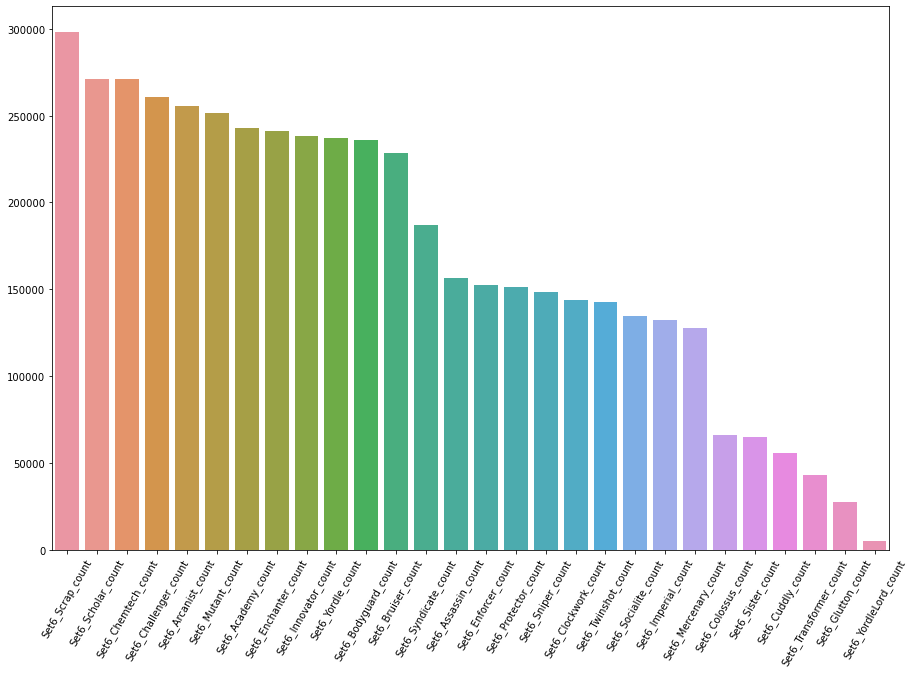

In [37]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = df[trait_count_cols].sum().sort_values(ascending = False).index,
           y = df[trait_count_cols].sum().sort_values(ascending= False))

ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
plt.savefig('../figures/traits_count')

In [38]:
trait_tier_cols = [col for col in df.columns if col[:4] == 'Set6' and '_tier' in col]

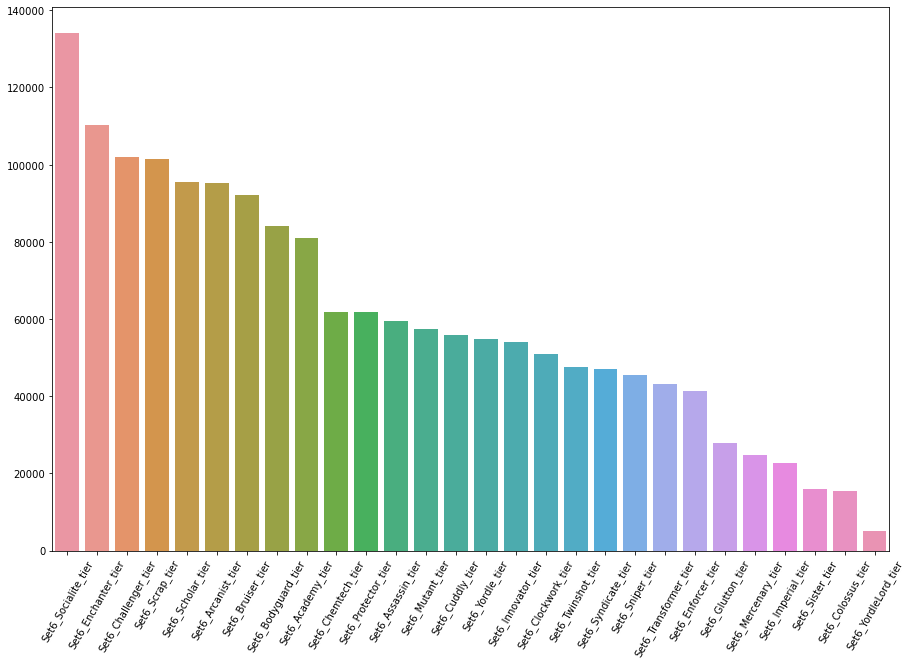

In [39]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = df[trait_tier_cols].sum().sort_values(ascending = False).index,
           y = df[trait_tier_cols].sum().sort_values(ascending= False))

ax.set_xticklabels(ax.get_xticklabels(), rotation=60);
plt.savefig('../figures/traits_tiers')

In [41]:
unit_count_cols = [col for col in df.columns if 'TFT6' in col]

<Figure size 432x288 with 0 Axes>

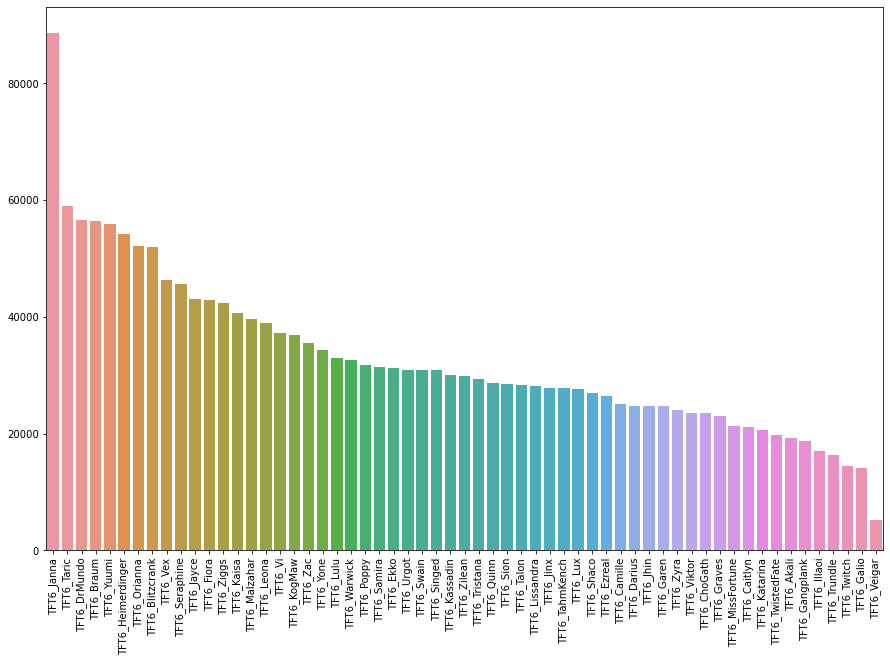

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x = df[unit_count_cols].sum().sort_values(ascending = False).index,
           y = df[unit_count_cols].sum().sort_values(ascending= False))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.figure('../figures/units_count')